In [6]:
class Node:
    def __init__(self, state, parent, neighbor, total_cost, level):
        self.state = state
        self.parent = parent
        self.neighbor = neighbor
        self.total_cost = total_cost
        self.level = level

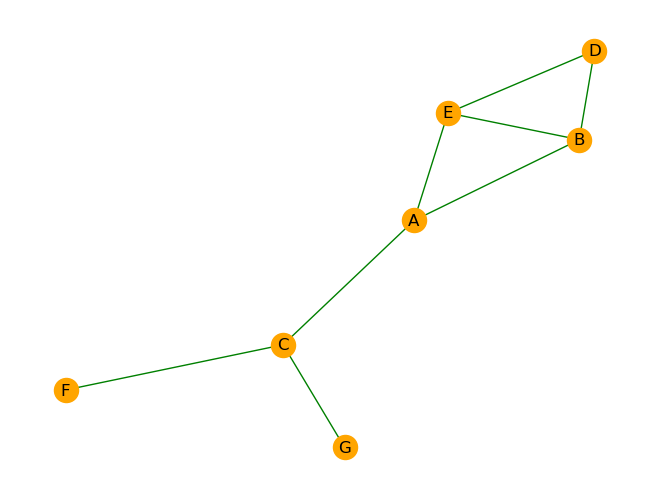

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a dictionary of nodes and their adjacent nodes
graphrep = {'A': ['B', 'C', 'E'], 'B': ['A', 'D', 'E'], 'C': ['A', 'F', 'G'], 'D': ['B', 'E'], 'E': ['A', 'B', 'D'], 'F': ['C'], 'G': ['C']}

# Create a graph object from the dictionary
G = nx.Graph(graphrep)

# Draw the graph with labels
nx.draw(G, with_labels=True, node_color='orange', edge_color='green')
plt.show()

In [7]:
# Node('A', None, ['B', 'C', 'E'], 0, 0)
Graph = {
    'A': Node('A', None, ['B', 'C', 'E'], 0, 0),
    'B': Node('B', None, ['A', 'D', 'E'], 0, 0),
    'C': Node('C', None, ['A', 'F', 'G'], 0, 0),
    'D': Node('D', None, ['B', 'E'], 0, 0),
    'E': Node('E', None, ['A', 'B', 'D'], 0, 0),
    'F': Node('F', None, ['C'], 0, 0),
    'G': Node('G', None, ['C'], 0, 0)
}

In [58]:
def actionSequence(start, goal, Graph):
    path = [goal]
    parent = Graph[goal].parent
    print("parent of start is ", Graph[start].parent)
    while parent!= start:
        # print(parent)
        path.append(parent)
        parent = Graph[parent].parent
    path.append(start)
    path.reverse()
    return path

In [59]:
def BFS(initial_state,goal_state,Graph):
   

    queue = [initial_state]
    explored = set()  # Use a set to keep track of explored nodes
    explored.add(initial_state)  # Add the initial state to the explored set
    while queue:
        state = queue.pop(0)
        explored.add(state) 
        if state == goal_state:
            return actionSequence(initial_state, goal_state, Graph)
        for neighbor in Graph[state].neighbor:
            if neighbor not in explored and neighbor not in queue:
                
                queue.append(neighbor)
                print(neighbor, " is added to queue")
                
                Graph[neighbor].parent = state
                Graph[neighbor].level = Graph[state].level + 1
                Graph[neighbor].total_cost = Graph[neighbor].level
    return None

# Call the BFS function after the Node class and Graph dictionary are defined
print(BFS("D", "C", Graph))


B  is added to queue
E  is added to queue
A  is added to queue
C  is added to queue
parent of start is  B
['D', 'B', 'A', 'C']


lab task one

In [60]:
Romania_map = {
    'Arad': Node('Arad', None, ['Zerind', 'Sibiu', 'Timisoara'], 0, 0),
    'Zerind': Node('Zerind', None, ['Arad', 'Oradea'], 0, 0),
    'Oradea': Node('Oradea', None, ['Zerind', 'Sibiu'], 0, 0),
    'Sibiu': Node('Sibiu', None, ['Arad', 'Oradea', 'Fagaras', 'Rimnicu Vilcea'], 0, 0),
    'Timisoara': Node('Timisoara', None, ['Arad', 'Lugoj'], 0, 0),
    'Lugoj': Node('Lugoj', None, ['Timisoara', 'Mehadia'], 0, 0),
    'Mehadia': Node('Mehadia', None, ['Lugoj', 'Drobeta'], 0, 0),
    'Drobeta': Node('Drobeta', None, ['Mehadia', 'Craiova'], 0, 0),
    'Craiova': Node('Craiova', None, ['Drobeta', 'Rimnicu Vilcea', 'Pitesti'], 0, 0),
    'Rimnicu Vilcea': Node('Rimnicu Vilcea', None, ['Sibiu', 'Pitesti', 'Craiova'], 0, 0),
    'Fagaras': Node('Fagaras', None, ['Sibiu', 'Bucharest'], 0, 0),
    'Pitesti': Node('Pitesti', None, ['Rimnicu Vilcea', 'Craiova', 'Bucharest'], 0, 0),
    'Bucharest': Node('Bucharest', None, ['Fagaras', 'Pitesti', 'Giurgiu', 'Urziceni'], 0, 0),
    'Giurgiu': Node('Giurgiu', None, ['Bucharest'], 0, 0),
    'Urziceni': Node('Urziceni', None, ['Bucharest', 'Vaslui', 'Hirsova'], 0, 0),
    'Vaslui': Node('Vaslui', None, ['Urziceni', 'Iasi'], 0, 0),
    'Iasi': Node('Iasi', None, ['Vaslui', 'Neamt'], 0, 0),
    'Neamt': Node('Neamt', None, ['Iasi'], 0, 0)
}

In [61]:
BFS('Arad', 'Bucharest', Romania_map)

Zerind  is added to queue
Sibiu  is added to queue
Timisoara  is added to queue
Oradea  is added to queue
Fagaras  is added to queue
Rimnicu Vilcea  is added to queue
Lugoj  is added to queue
Bucharest  is added to queue
Pitesti  is added to queue
Craiova  is added to queue
Mehadia  is added to queue
parent of start is  None


['Arad', 'Sibiu', 'Fagaras', 'Bucharest']

In [62]:


puzzle = [
    ['#', '#', '#', '#', '#', 'E', '#', '#'],
    ['#', '.', '.', '.', '.', '.', '.', '#'],
    ['#', '.', '#', '#', '#', '#', '.', '#'],
    ['#', '.', '#', 'S', '#', '.', '.', '#'],
    ['#', '.', '#', '.', '#', '#', '.', '#'],
    ['#', '.', '#', '.', '#', '.', '.', '#'],
    ['#', '.', '.', '.', '.', '.', '.', '#'],
    ['#', '#', '#', '#', '#', '#', '#', '#']
]


In [69]:
def find_start(puzzle):
    for i in range(len(puzzle)):
        for j in range(len(puzzle[0])):
            if(puzzle[i][j] == 'S'):
                return (i,j)
    return None

print(find_start(puzzle)[0])

3


In [64]:
def find_end(puzzle):
    for i in len(puzzle):
        for j in len(puzzle[0]):
            if(puzzle[i][j] == 'E'):
                return (i,j)
    return None

In [67]:
def initilze_queue(puzzle):
    matrix = []
    for i in range(len(puzzle)):
        row = []
        for j in range(len(puzzle[0])):
            row.append(False)
        matrix.append(row)
        
    return matrix

In [71]:
def solve_puzzle(puzzle):
    R,C = len(puzzle), len(puzzle[0])
    start = find_start(puzzle)
    
    queue = []
    explored = initilze_queue(puzzle)
    queue.append((start[0],start[1], 0))
    # you can go up, down,left,and right
    directions = [[0, 1], [0, -1], [1, 0], [-1, 0]]
    
    while(queue):
        current_node = queue.pop(0)
        current_x = current_node[0]
        current_y = current_node[1]
        current_cost = current_node[2]
        explored[current_node[0]][current_node[1]] = True
        if(puzzle[current_x][current_y] == "E"):
            return current_cost
        for neighbour in directions:
            new_x = current_x + neighbour[0]
            new_y = current_y + neighbour[1]
            #check if the new coordinates are withing the boundary
            if(new_x <0 or new_x >= R or new_y<0 or new_y>= C or puzzle[new_x][new_y] == '#' or explored[new_x][new_y] == True ):
                continue
            else:
                queue.append((new_x,new_y, current_cost + 1))
                
        
solve_puzzle(puzzle)

13